In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import random

sys_values = False
if (sys_values):
    import sys
    print("sys.executable: ", sys.executable)
    print("-----------------")
    !type python
    print("-----------------")
    from pprint import pprint as p
    p(sys.path)

/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_86680/149081734.py:19: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(audio_path, sr=None)
/Users/brash/anaconda3/envs/phys441/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


<class 'numpy.ndarray'> <class 'int'>


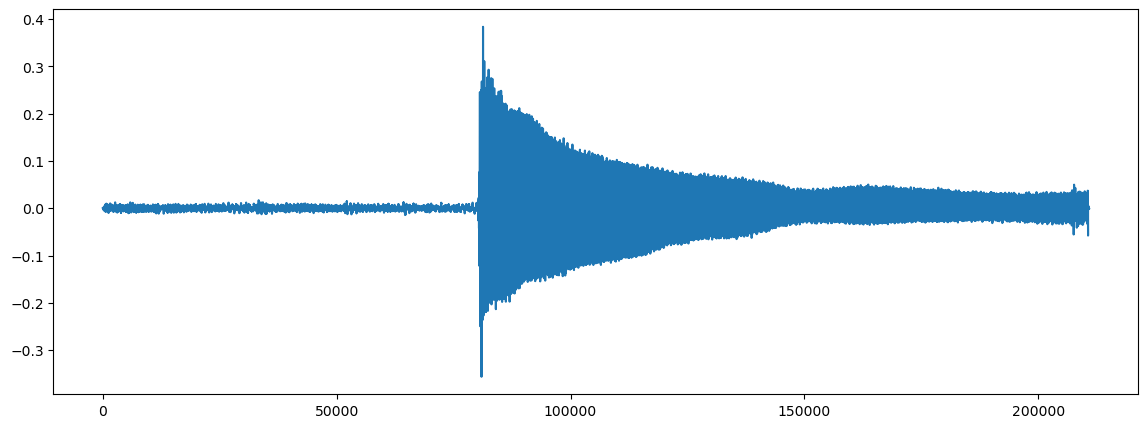

In [2]:
import librosa

choice = 3

if (choice == 1):
    audio_path = './LowE.mp4'
    start_time = 2.18
elif (choice == 2):
    audio_path = './MidE.mp4'
    start_time = 2.38
elif (choice == 3):
    audio_path = './HighE.mp4'
    start_time = 1.88

#import audioread.ffdec
#aro = audioread.ffdec.FFmpegAudioFile(audio_path)
#x, sr = librosa.load(aro)

x, sr = librosa.load(audio_path, sr=None)

print(type(x), type(sr))

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

import librosa.display

plt.plot(x)

/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_86680/222676726.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y1, sr1 = librosa.load(audio_path, offset=start_time,duration=0.160,sr=None)
/Users/brash/anaconda3/envs/phys441/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_86680/222676726.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y2, sr2 = librosa.load(audio_path, offset=start_time+3.20-2*0.320,duration=0.160,sr=None)


Text(0.5, 1.0, 'Monophonic')

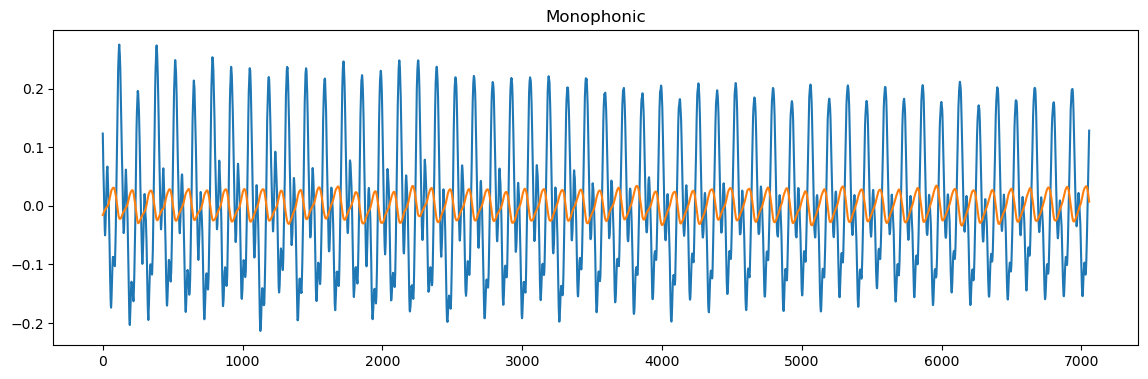

In [3]:
y1, sr1 = librosa.load(audio_path, offset=start_time,duration=0.160,sr=None)
y2, sr2 = librosa.load(audio_path, offset=start_time+3.20-2*0.320,duration=0.160,sr=None)

plt.figure(figsize=(14, 9))
plt.subplot(2, 1, 1)
#librosa.display.waveshow(y)
plt.plot(y1)
plt.plot(y2)
plt.title('Monophonic')

In [4]:
sp1 = np.fft.fft(y1)
dt1 = 1.0/sr1
nframes = len(y1)
f1 = []
t1 = []
power1 = []
for i in range(int(len(y1)/2)):
    t1.append(i*dt1)
    f1.append(i/(nframes*dt1))
    power1.append(sp1.real[i]**2+sp1.imag[i]**2)
t1 = np.array(t1)
f1 = np.array(f1)
power1 = np.array(power1)

sp2 = np.fft.fft(y2)
dt2 = 1.0/sr2
nframes = len(y2)
f2 = []
t2 = []
power2 = []
for i in range(int(len(y2)/2)):
    t2.append(i*dt2)
    f2.append(i/(nframes*dt2))
    power2.append(sp2.real[i]**2+sp2.imag[i]**2)
t2 = np.array(t2)
f2 = np.array(f2)
power2 = np.array(power2)

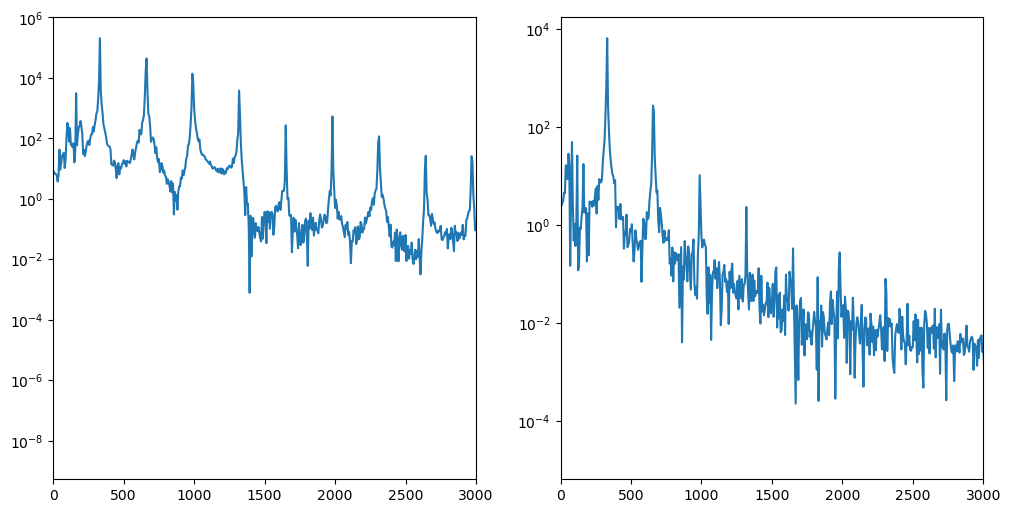

In [5]:

#plt.xscale("log")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax[0].plot(f1, power1)
ax[0].set_xlim(0,3000)
ax[1].plot(f2, power2)
ax[1].set_xlim(0,3000)
ax[0].set_yscale("log")
ax[1].set_yscale("log")

(0.0, 22046.875)

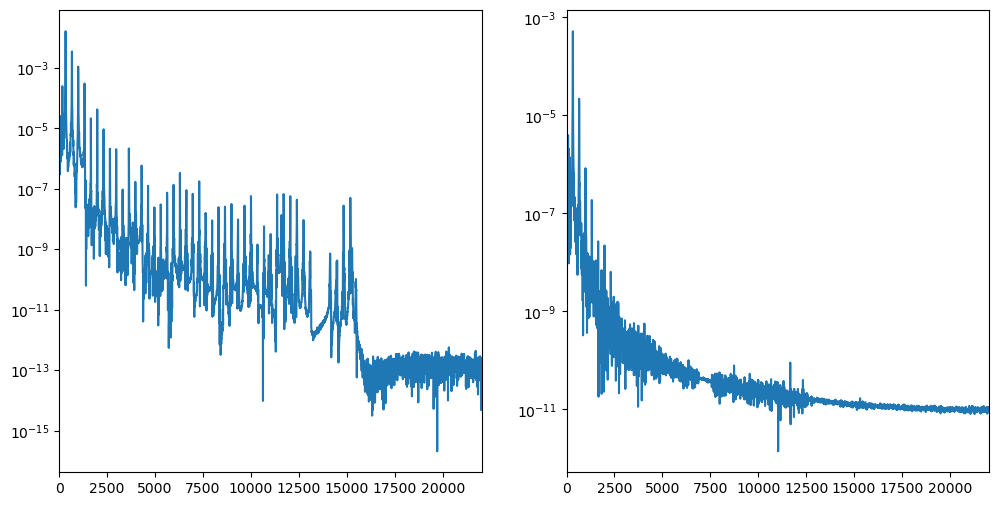

In [6]:
N_fft1 = len(y1)
yfft1 = fft(y1)
yfftReal1 =2.0/N_fft1*yfft1.real
yfftImag1 = 2.0/N_fft1*yfft1.imag
powerfft1 = 4.0/N_fft1**2*abs(yfft1)**2

dt1 = 1.0/sr1
f1 = [i/(N_fft1*dt1) for i in range(0,N_fft1)]

N_fft2 = len(y2)
yfft2 = fft(y2)
yfftReal2 =2.0/N_fft2*yfft2.real
yfftImag2 = 2.0/N_fft2*yfft2.imag
powerfft2 = 4.0/N_fft2**2*abs(yfft2)**2

dt2 = 1.0/sr2
f2 = [i/(N_fft2*dt2) for i in range(0,N_fft2)]


fig2, axs2 = plt.subplots(nrows=1, ncols=2, figsize=(12,6)) 
axs2[0].set_yscale("log")
axs2[0].plot(f1,powerfft1)
axs2[0].set_xlim(0,np.max(f1)/2)
axs2[1].set_yscale("log")
axs2[1].plot(f2,powerfft2)
axs2[1].set_xlim(0,np.max(f2)/2)

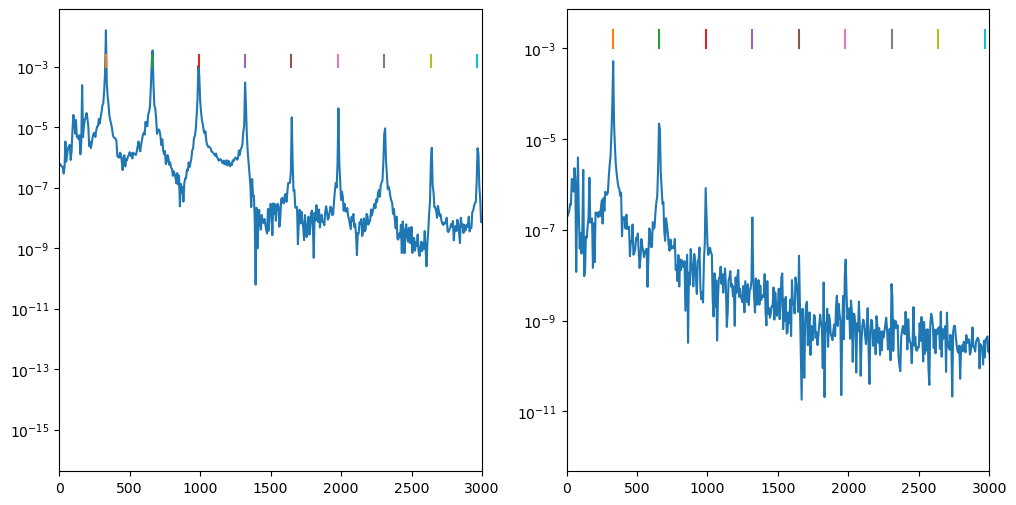

In [7]:
fig2, axs2 = plt.subplots(nrows=1, ncols=2, figsize=(12,6)) 
axs2[0].set_yscale("log")
axs2[1].set_yscale("log")

axs2[0].plot(f1,powerfft1)
axs2[0].set_xlim(0,3000)
axs2[1].plot(f2,powerfft2)
axs2[1].set_xlim(0,3000)

if (choice == 1):
    e_nominal = 82.407
elif (choice == 2):
    e_nominal = 164.814
elif (choice == 3):
    e_nominal = 329.628
    
efreq = [e_nominal*i for i in range(1,10)]

for i in range(len(efreq)):
    vliney = []
    vlinex = []
    vlinex.append(efreq[i])
    vliney.append(0.001)
    vlinex.append(efreq[i])
    vliney.append(0.0025)
    axs2[0].plot(vlinex,vliney)
    axs2[1].plot(vlinex,vliney)
